In [1]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd

In [2]:
url = 'https://www.sedaily.com/Stock/Quote?type=1' 
html = requests.get(url)
soup = BeautifulSoup(html.text,"html.parser")
soup


<!DOCTYPE html>

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>전종목 시세 : 서울경제</title>
<meta content="전종목 시세 : 서울경제" name="Author"/>
<meta content="전종목 시세 : 서울경제" name="Keywords"/>
<link href="https://img.sedaily.com/Html/Common/sed.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://img.sedaily.com/Html/Common/sed.ico" rel="icon" type="image/x-icon"/>
<link href="https://img.sedaily.com/Html/Common/favicon-228.png" rel="apple-touch-icon-precomposed" sizes="228x228"/>
<link href="https://img.sedaily.com/Html/Common/favicon-195.png" rel="apple-touch-icon-precomposed" sizes="195x195"/>
<link href="https://img.sedaily.com/Html/Common/favicon-152.png" rel="apple-touch-icon-precomposed" sizes="152x152"/>
<link href="https://img.sedaily.com/Html/Common/favicon-144.png" rel="apple-touch-icon-precomposed" sizes="144x144"/>

In [3]:
all_table = soup.find_all('div',{'class':'table'}) #숨겨진 class 찾기
all_table

[<div class="table">
 <div>
 <dl class="thead">
 <dt><a href="javascript:window.open('/StockIndex?market=1&amp;tab=2&amp;IndustryCode=018','_blank')" title="">건설</a></dt>
 <dd id="dd_Category_018">
 <span class="up">108.20</span>
 <span class="up"><span>1.19</span></span>
 <span class="up">+1.11%</span>
 </dd>
 </dl>
 <dl class="tbody">
 <dt><a href="javascript:window.open('/Stock/006360','_blank');" title="GS건설">GS건설</a></dt>
 <dd id="dd_Item_006360">
 <span class="up">40,400</span>
 <span class="up"><span>1,150</span></span>
 <span class="up">+2.93%</span>
 </dd>
 </dl>
 <dl class="tbody">
 <dt><a href="javascript:window.open('/Stock/039570','_blank');" title="HDC아이콘트롤스">HDC아이콘트롤스</a></dt>
 <dd id="dd_Item_039570">
 <span class="up">9,940</span>
 <span class="up"><span>50</span></span>
 <span class="up">+0.51%</span>
 </dd>
 </dl>
 <dl class="tbody">
 <dt><a href="javascript:window.open('/Stock/294870','_blank');" title="HDC현대산업개발">HDC현대산업개발</a></dt>
 <dd id="dd_Item_294870">
 <span 

In [118]:
A = [] #주식종목 찾아서 리스트에 입력
for thead in all_table:
    dl = thead.find('dl',{'class':'thead'})
    dt = dl.find('dt')
    fieldName = dt.text
    
    tbody =thead.find_all('dl',{'class':'tbody'})
    
    
    for dl in tbody:
        name=dl.find('dt').get_text()
        dd=dl.find('dd')
        code = dd.get('id').replace('dd_Item_',"")
    
        A.append(code)
            
A

IndentationError: unindent does not match any outer indentation level (<ipython-input-118-82c2dfac202e>, line 15)

In [5]:
A.remove('316140') # xml파일에 없는 데이터 삭제
A.remove('307950')
A.remove('298690')
A.remove('00806K')
A.remove('192650')
A.remove('069460')

In [1]:
import requests #xml 파일에서 종목별 주가데이터 추출 2014년 5월 1일부터 2019년 5월 1일까지 5년간 데이터 추출. 
import pandas as pd
import xml.etree.ElementTree as ET


def getStockPrice(StockCode, Count = 1825+6) :
    ret = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close','volumn'])
    
    url = "https://fchart.stock.naver.com/sise.nhn?symbol={}&timeframe=day&count={}&requestType=0"
    url = url.format(StockCode, Count)
    response = requests.get(url)
    
    e = ET.fromstring(response.text)
    
    stock_history = []
    for item in e.find('chartdata').findall('item') :
        data = item.get('data').split('|')
        tmp = [data[0],int(data[1]),int(data[2]),int(data[3]),int(data[4]),int(data[5])]
        
        if data[0] >= '20140501' and data[0] <= '20190501' :
            ret.loc[len(ret)] = tmp

    return ret

kos = getStockPrice('KOSPI')

ValueError: invalid literal for int() with base 10: '1791.62'

In [7]:
import requests
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
from urllib.request import urlopen
import pandas as pd

In [ ]:
df = getStockPrice(A[0])
df.to_csv('1.csv', index=False)

In [81]:
len(A)

863

In [ ]:
a= [] #주가데이터 종목별 csv파일 저장
for i in range(len(A)):
    
    stock = getStockPrice(A[i])
    #stock = stock.replace(to_replace = 'None', value = np.nan).dropna()
    filename = './data/{}.csv'.format(A[i])
    stock.to_csv(filename)
    print(filename)
    #a.append(stock)

./data/006360.csv
./data/039570.csv
./data/294870.csv
./data/013580.csv
./data/004200.csv
./data/002990.csv
./data/002995.csv
./data/013700.csv
./data/001260.csv
./data/000210.csv
./data/000215.csv


In [37]:
import pandas as pd #5년치 일별 데이터 1224개가 없는 종목 삭제, 모든 종목별 주가데이터 csv파일을 리스트에 입력
from os import listdir
from os.path import isfile, join

source_folder = "./data/"

txt_files = [f for f in listdir(source_folder) if isfile(join(source_folder, f))]
txt_files_1224 = []

for txt_file in txt_files :
    df = pd.read_csv(source_folder + txt_file)
    if df.shape[0] == 1224 :
        txt_files_1224.append(source_folder + txt_file)
        
df.to_csv("stockprice",header=False, index=False)

In [50]:
 #788종목중 100종목 추출 --> 메모리 에러 수정하기 위해서 

In [38]:
b = []
for i in txt_files_1224:
    #a = pd.read_csv(i)
    
    code =(i.split('/')[2].split('.')[0])
    b.append(code)

KeyboardInterrupt: 

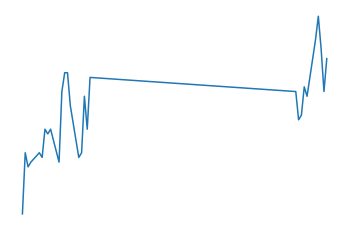

In [46]:
#주가 그래프 생성 [5:34],[15,44],[25,54] ... 29일씩 10일 간격. 추세를 분석할 수 있도록 일정 간격 중복된 주가 이미지 생성. 날짜와 종가만을 추출
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import scipy
import scipy.misc


for i in txt_files_1224:
    a = pd.read_csv(i)
    
    for k in b:
        
        #print(k)
        
        for j in range(0,1190,10):
            x = a['date'][j+5:j+34]# a[0]['date'][:10]
            y = a['close'][j+5:j+34]#a[0]['close'][:10]

#             if j % 100 == 0 :
#                print(j)

            #plt.xlabel('Date')
            #plt.ylabel('Close')
            plt.plot(x,y)
            plt.axis('off')  
            plt.savefig('./png/{}{}.png'.format(k,j))
            plt.clf()

            im = Image.open('./png/{}{}.png'.format(k,j))
            im = im.convert("RGB")
            im = im.resize((100,100))
            im.save('./image/{}{}.jpg'.format(k,j))

            

In [42]:
#이미지 pixel 값 숫자 배열로 변환
import cv2
from scipy import misc

pixels = []
for k in b:
    
    #print(k)
    
    for j in range(0,1190,10):
        
        im = cv2.imread('./image/{}{}.jpg'.format(k,j))

        pixels.append(im)


In [62]:
#대한항공 이미지 pixel 값 숫자 배열로 변환
import cv2
from scipy import misc

pixels1 = []
for j in range(0,1190,10):
        
        im = cv2.imread('./jpg_bak2/{}.jpg'.format(j))

        pixels1.append(im)

In [39]:
#return 값 log수익률 이용
import math
import numpy as np

returns = []

for i in txt_files_1224:
    
    code =(i.split('/')[2].split('.')[0])
    
    a = pd.read_csv('./data/{}.csv'.format(code))
    
    
    for g in range(0,1190,10):

            
        a['close'][34+g:39+g]

        p1 = np.mean(a['close'][34+g])

        p2 = np.mean(a['close'][39+g])

        returns.append(math.log(p2/p1))
        

In [64]:
#대한항공 return 값 log수익률 이용
for g in range(0,1190,10):

            
    t['close'][34+g:39+g]

    p1 = np.mean(t['close'][34+g])

    p2 = np.mean(t['close'][39+g])

    returns1.append(math.log(p2/p1))

In [111]:
len(pixels) #총 92582개의 이미지, 라밸링을 위한 수익률 생성

11900

In [112]:
len(returns)

11900

In [113]:
len(pixels1) #대한항공 이미지

119

In [116]:
len(returns1) #대한항공 리턴값 

119

In [9]:
import numpy as np
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D  
from keras.optimizers import SGD
from keras.utils import np_utils
from scipy import misc
import glob
import matplotlib.pyplot as plt
from PIL import Image
import math

Using TensorFlow backend.


In [10]:
#r squared값, 모델 구축

seed = 7 
np.random.seed(seed)
width = 1
height = 1


def r_squared(y_true, y_hat):
    ssr = 0
    sst = 0
    e = np.subtract(y_true, y_hat)
    y_mean = np.mean(y_true)
    for item in e:
        ssr += item**2
    for item in y_true:
        sst += (item - y_mean)**2
    r2 = 1 - ssr / sst
    return r2


def compile_model(model):
    lrate = 0.01
    sgd = SGD(lr=lrate, momentum=0.9, decay=1e-6, nesterov=True)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd)
    return model


def create_model():
    model = Sequential()

    model.add(Convolution2D(32, 3, 3,
                            border_mode='valid', 
                            input_shape=(100, 100, 3)))  
    model.add(Activation('relu'))  
    model.add(Convolution2D(32, 3, 3))  
    model.add(Activation('relu'))  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))  
      
    model.add(Convolution2D(64, 3, 3, 
                            border_mode='valid'))  
    model.add(Activation('relu'))  
    model.add(Convolution2D(64, 3, 3))  
    model.add(Activation('relu'))  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))  
      
    model.add(Flatten())  
    model.add(Dense(256))  
    model.add(Activation('relu'))  
    model.add(Dropout(0.5))

    model.add(Dense(2))  
    model.add(Activation('softmax'))  

    return model

In [117]:
#CNN모델 학습
def main():
   # data = load_sample_data()
    #plot_data(data)
 
    #convert_image()
    print(1)
   
    x = np.asarray(pixels) #11900 이미지 학습
    y = np.asarray(returns) #11900 이미지 학습
    x1 = np.asarray(pixels1) # 119이미지 학습
    y1 = np.asarray(returns1) # 119이미지 학습
    
    
    x_train = x # 생성한 이미지 파일갯수 - 100
    y_train = y
    x_test = x1
    y_test = y1
#    y_true = y_test
#    y_train = np_utils.to_categorical(y_train, 2)
#    y_test = np_utils.to_categorical(y_test, 2)
    print(2)
    x_train = x_train.astype('float32')
    print(x_test)
    x_test = x_test.astype('float32')
    x_train /= 255.0
    x_test /= 255.0
    model = create_model()
    model = compile_model(model)
    print(3)
    # Fit the model
    epochs = 10
    model.fit(x_train, y_train, validation_data=(x_test, y_test), 
              nb_epoch=epochs,
              shuffle=True, batch_size=100, verbose=1)
#    scores = model.evaluate(x_test, y_test, verbose=0)
#    print('Accuracy: %.2f%%' % (scores[1] * 100))
    classes = model.predict_classes(x_test, verbose=0)
    classes = list(classes)

    print(classes)
    y_test = list(y_test)
    print(y_test)
    r2 = r_squared(y_test, classes)
    print(r2)


if __name__ == '__main__':
    main()


1
2
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255

/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,..., padding="valid")`
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


3


/usr/lib/python3/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 11900 samples, validate on 119 samples
Epoch 1/10
11900/11900 [==============================] - 561s 47ms/step - loss: 0.0067 - val_loss: 1.1921e-07
Epoch 2/10
11900/11900 [==============================] - 561s 47ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 3/10
11900/11900 [==============================] - 561s 47ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 4/10
11900/11900 [==============================] - 564s 47ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 5/10
11900/11900 [==============================] - 561s 47ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 6/10
11900/11900 [==============================] - 562s 47ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 7/10
11900/11900 [==============================] - 561s 47ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 8/10
11900/11900 [==============================] - 565s 47ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 9/10
11900/11900 [============

In [ ]:
(1) 3.617303878100664e-05 = -0.00003617303878100664 #전체이미지 학습, 모델의 성능평가 r-squared 값

In [ ]:
(2) -0.00029485231068648865 #대한항공 r-squared 값